# This is the Juypter Notebook containing simulations for Theorem 3 in the paper "Networked Competitive Bivirus SIS Model - Analysis of the Discrete-Time Case"

In [8]:
import bivirus
import numpy as np

In [9]:
def path_graph_adjacency(n, W = 1):
    A = np.zeros((n, n))
    for i in range(n - 1):
        A[i, i + 1] = np.random.uniform(0, W)
        A[i + 1, i] = np.random.uniform(0, W)
    return A

In [10]:
# configurations of the experiment
config = bivirus.SimulationConfig(N=20, h=0.001, threshold=1.5, W=2, iterations=10000, tolerance=1e-6)

# random seed for reproducibility
seed = 1049
np.random.seed(seed)

# parameters of the model
A1_raw, A2_raw = np.random.uniform(0, config.W, (config.N, config.N)), np.random.uniform(0, config.W, (config.N, config.N))
# Set all values in A below 'threshold' to zero
A1_thres = np.where(A1_raw < config.threshold, 0, A1_raw)
A2_thres = np.where(A2_raw < config.threshold, 0, A2_raw)

# add the path graph adjacency matrix to ensure strong connectivity
A1 = A1_thres + path_graph_adjacency(config.N, W=config.W/10)
A2 = A2_thres + path_graph_adjacency(config.N, W=config.W/10)

beta = [
    np.ones(config.N),
    np.ones(config.N)
]
B1 = np.diag(beta[0]) @ A1
B2 = np.diag(beta[1]) @ A2
B = [B1, B2]
delta = [
    30 * np.ones(config.N),
    1 * np.ones(config.N)
]
print("B1 is:", B1)
print()
print("B2 is:", B2)

B1 is: [[1.50050961 1.88605606 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.56211491
  1.67562643 0.        ]
 [0.19991683 1.79269898 0.1711156  0.         1.89839503 1.75372476
  0.         0.         1.61642985 1.98947965 0.         0.
  0.         0.         0.         1.91290717 0.         1.82915066
  0.         0.        ]
 [0.         0.15255302 0.         1.81391791 0.         0.
  0.         1.85324135 0.         0.         0.         0.
  0.         1.63046893 1.52575372 1.52771313 0.         0.
  1.50982707 0.        ]
 [0.         1.73389734 1.95187889 0.         0.1062009  1.69746892
  0.         0.         1.89525712 0.         0.         0.
  1.64720756 0.         1.99329845 0.         0.         0.
  0.         1.520101  ]
 [0.         0.         0.         0.05966601 0.         1.88022167
  0.         0.         1.8831194  1.91327549 1.6035491  0.
  0.         

In [11]:
# check assumptions of the theorems 2 and 3
print("Assumptions of theorems:")
print("Theorem 2 satisfied:", bivirus.check_theorem_2(B, delta, config))
print("Theorem 3:", bivirus.check_theorem_3(B, delta, config))

Assumptions of theorems:
spectral radius 1 is 0.9785954397851362
spectral radius 2 is 1.0081991492504416
Theorem 2 satisfied: False
Theorem 3: 3.2


The two code blocks below represent two different initialization strategies for the same model(i.e., same network, same parameters)

All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875
 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875]
Main loop Converged at iteration 2791
All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375
 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375]
Main loop Converged at iteration 2552
All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625
 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625]
Main loop Converged at iteration 2169
All assumptions satisfied
x1 is [0.5 0.5 0.5 0.5 0.5 0

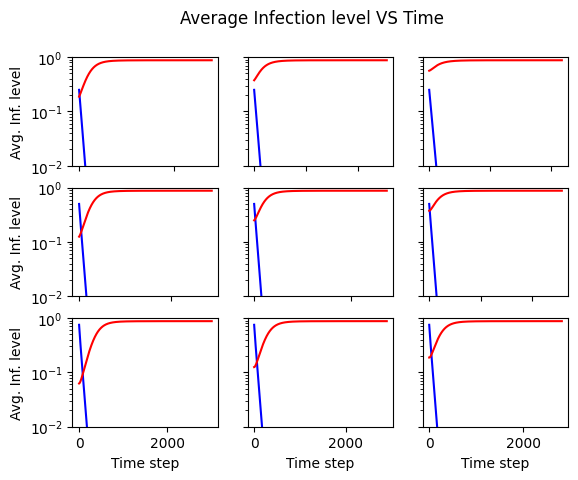

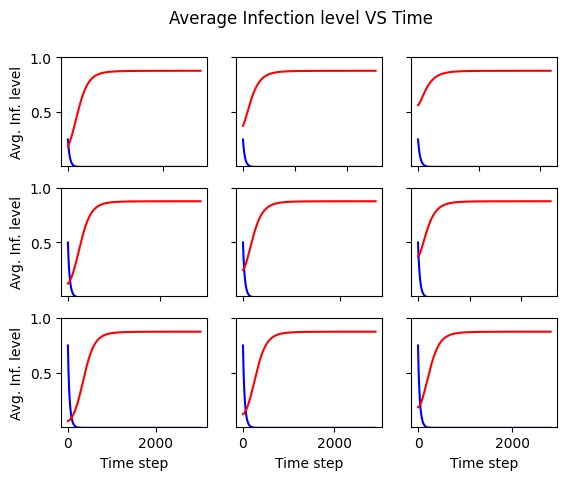

In [12]:
# initialization logic to test starting states covering "a large portion of \mathcal D"
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for num1 in [0.25, 0.50, 0.75]:
    num2bound = 1 - num1
    num2list = [num2bound * (i + 1) / 4 for i in range(3)]
    for num2 in num2list:

        x1.fill(num1)
        x2.fill(num2)
        bivirus.check_basic_assumptions(x1, x2, B, delta, config)

        print('x1 is '+str(x1))
        print('x2 is ' + str(x2))
        results = bivirus.run_simulation(x1, x2, B, delta, config)
        x1_avg_histories.append(results["x1_avg_history"])
        x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='log')
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear')

All assumptions satisfied
x1 is [0.83873615 0.81357894 0.81511811 0.79761368 0.27655823 0.36578192
 0.20047979 0.32800934 0.4084654  0.43798017 0.19672489 0.4661114
 0.2454622  0.69874518 0.71065857 0.25851469 0.31879243 0.3158388
 0.3871321  0.3315709 ]
x2 is [0.10625864 0.04971415 0.00817668 0.19140771 0.27572269 0.25547901
 0.20177306 0.23117895 0.341891   0.44158163 0.21101837 0.34930292
 0.41222676 0.28804844 0.2532895  0.27152699 0.13764205 0.04741114
 0.02194305 0.07518235]
Main loop Converged at iteration 2673
All assumptions satisfied
x1 is [0.04045101 0.86811788 0.53223825 0.91823514 0.29776196 0.75760516
 0.57473849 0.15011871 0.25968417 0.03831757 0.50451647 0.57041754
 0.7623567  0.15253063 0.03809062 0.88238758 0.52117377 0.428582
 0.70241697 0.99542661]
x2 is [0.51287364 0.10605908 0.44994844 0.04450452 0.61586044 0.13816114
 0.40243199 0.24417983 0.73548173 0.67303264 0.33196902 0.16104913
 0.20640671 0.13982031 0.14698424 0.00817368 0.31539736 0.53905678
 0.28429685 0.

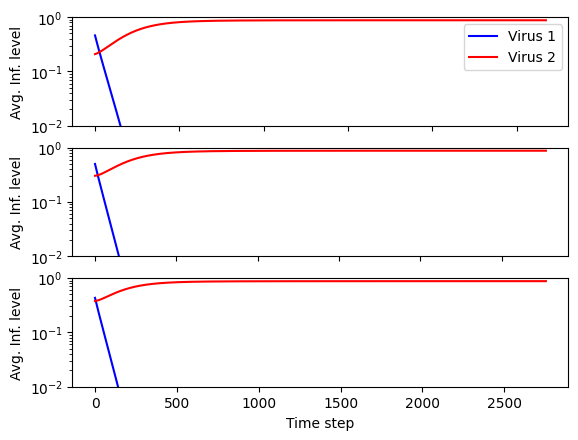

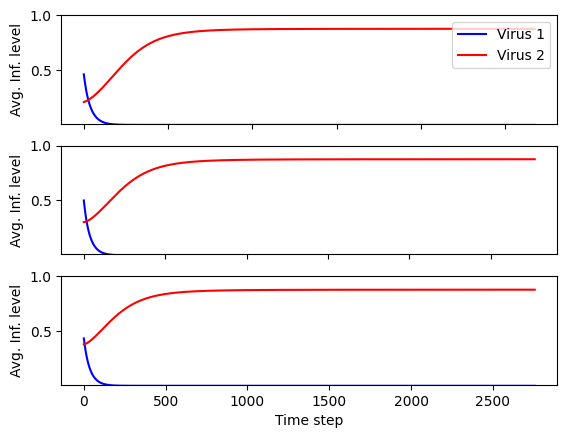

In [16]:
# Completely random initializations
x1_avg_histories = []
x2_avg_histories = []

for i in range(3):
    x1 = np.random.uniform(0, 1, config.N)
    x2 = np.random.uniform(0, 1 - x1, config.N)
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    print("x1 is "+str(x1))
    print("x2 is "+str(x2))
    results = bivirus.run_simulation(x1, x2, B, delta, config)
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_1by3(x1_avg_histories, x2_avg_histories, yscale='log')
bivirus.plot_simulation_1by3(x1_avg_histories, x2_avg_histories, yscale='linear')


Let us examine the single-virus equilibrium $(0, \bar{x}_2)$

In [14]:
x1_bar = [x1_avg_histories[i][-1] for i in range(len(x1_avg_histories))]
print(x1_bar)
print("average of equilibria of virus 1 across 9 simulations, should not be very close to zero(virus 1 dies out):", np.mean(x1_bar))
print("variance of equilibria of virus 1 across 9 simulations: ", np.var(x1_bar), "\n")

x2_bar = [x2_avg_histories[i][-1] for i in range(len(x2_avg_histories))]
print(x2_bar)
print("average of equilibria of virus 2 across 9 simulations, should not be very close to zero:", np.mean(x2_bar))
print("variance of equilibria of virus 2 across 9 simulations: ", np.var(x2_bar))

[np.float64(4.147134992866151e-28), np.float64(3.288139452773787e-37), np.float64(5.923311153880541e-36), np.float64(1.6136130184709039e-37), np.float64(5.952149893403995e-29), np.float64(9.09568665235234e-36), np.float64(1.69156333413975e-37), np.float64(2.23515166136501e-37), np.float64(1.423547850509861e-35)]
average of equilibria of virus 1 across 9 simulations, should not be very close to zero(virus 1 dies out): 5.269278092866423e-29
variance of equilibria of virus 1 across 9 simulations:  1.6726814763104299e-56 

[np.float64(0.8754775120493126), np.float64(0.8754789329922208), np.float64(0.8754789752090893), np.float64(0.8754789483924649), np.float64(0.8754782651550718), np.float64(0.8754788959212141), np.float64(0.875478959748404), np.float64(0.8754789651902325), np.float64(0.8754789101719378)]
average of equilibria of virus 2 across 9 simulations, should not be very close to zero: 0.8754787072033277
variance of equilibria of virus 2 across 9 simulations:  2.2354740542035007e-13